In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import json
import os

import open3d

import numpy as np
import cv2
from matplotlib import pyplot as plt

# Set the default figure size for matplotlib plots
plt.rcParams["figure.figsize"] = [10, 5] # Values are in inches


def cv2_imshow(bgr: np.ndarray) -> None:
    """Displays the image in jupyter notebook

    Converts the image from BGR to RGB format as cv2 uses BGR formatand matplotlib
    uses RGB format.


    Args:
        bgr (np.ndarray): Image in BGR format [H, W, C]
    """
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.show()


def visualize_tag_detection(
    image: np.ndarray,
    corners: list,
    ids: list = None,
    color: tuple = (0, 255, 0),
    width: int = 2,
) -> np.ndarray:
    """Visualize the detection of markers by outliying them in the image

    Args:
        image (np.ndarray): Image in BGR format [H, W, C]
        corners (list): list of the detected corners of the markers in the image
        ids (list, optional): Ids of corresponding marker corners. Defaults to None.
        color (tuple, optional): Color of the outline. Defaults to Green.
        width (int, optional): Width of the outline. Defaults to 2.

    Returns:
        np.ndarray: Image with the detected markers outlined
    """
    # print(f"Number of corners: {len(corners)}")
    # print(corners)

    for e, corner in enumerate(corners):
        corner = np.int32(corner)
        # Tag circumference highlight
        cv2.polylines(image, corner, True, color, width)
        # Indicate the first corner by inputting a circle
        cv2.circle(image, (corner[0][0][0], corner[0][0][1]), 2 * width + 1, color, -1)
        if ids is not None:
            idx = ids[e]
            cv2.putText(
                image,
                str(idx[0]),
                (corner[0][0][0], corner[0][0][1]),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                color,
                width,
            )

    return image

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


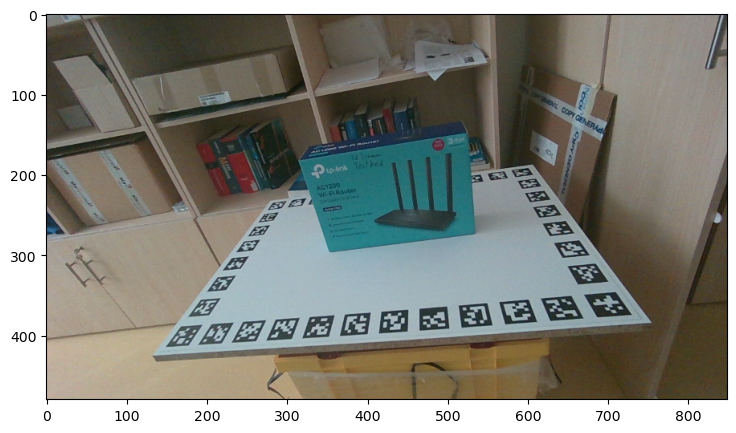

(480, 848, 3)


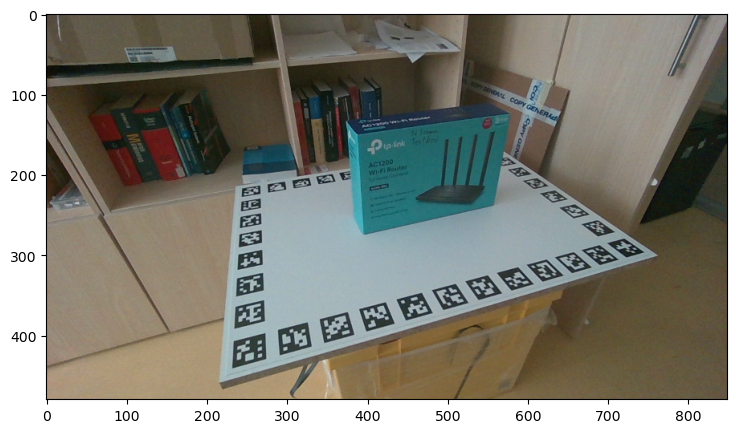

(480, 848, 3)


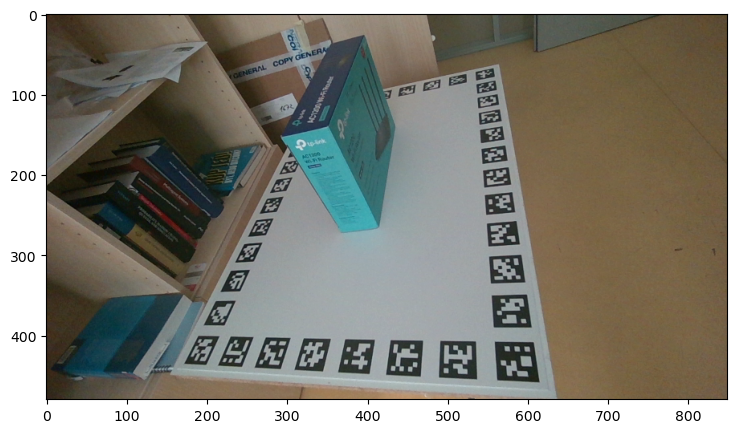

(480, 848, 3)


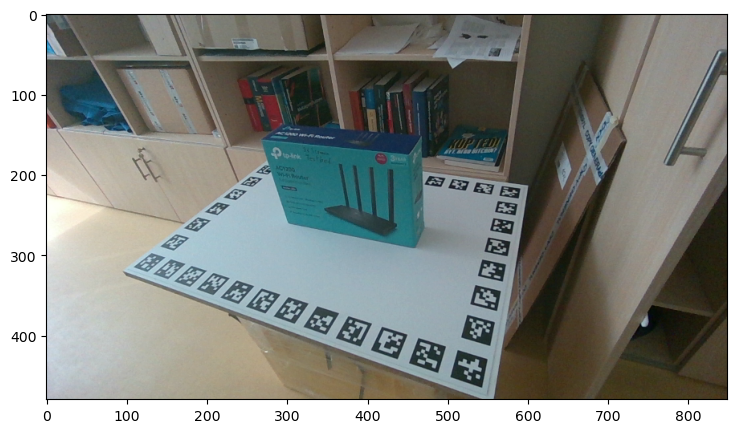

(480, 848, 3)


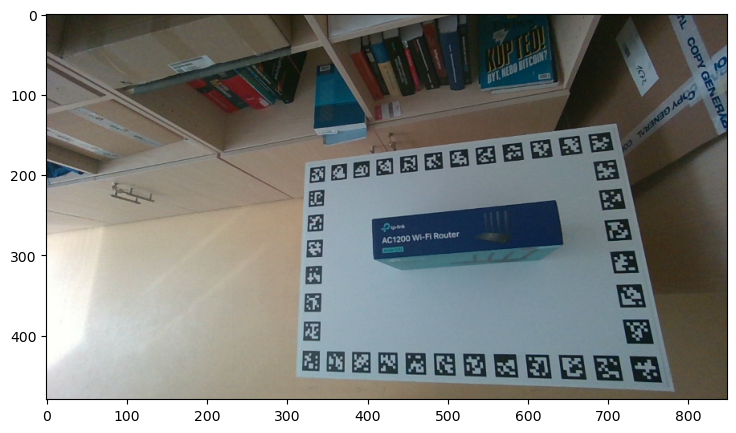

(480, 848, 3)


In [4]:
images = [
    "data/color_000000.png",
    "data/color_000001.png",
    "data/color_000002.png",
    "data/color_000003.png",
    "data/color_000004.png",
]
for i, image in enumerate(images):
    bgr = cv2.imread(image)
    if bgr is None:
        print(f"Failed to read image {image}")
        continue
    cv2_imshow(bgr)
    print(bgr.shape)
    

In [ ]:
# Loading the board data Which contains the marker positions know from the design
board_data_path =  "data/board/board_centered_mm.json"
with open(board_data_path, "r") as f:
    board_data = json.load(f)

# Loading the camera parameters
camera_params_path = "data/camera_params.json"
with open(camera_params_path, "r") as f:
    camera_params = json.load(f)
    camera_color_params = camera_params["color"]
Kmx = np.array(camera_color_params["Kmx"])
dist_coeffs = np.array(camera_color_params["coeffs"])


[[425.75253296   0.         425.91796875]
 [  0.         425.25878906 244.5151825 ]
 [  0.           0.           1.        ]]
[-0.05731409  0.06807556  0.00045162  0.00100828 -0.02175004]


In [6]:
params = cv2.aruco.DetectorParameters()
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36H11)
detector = cv2.aruco.ArucoDetector(aruco_dict, params)

Number of detected tags: 19
(76, 2)
(76, 3)
Rvec: [[-0.64963435]
 [ 0.96910569]
 [ 1.37688378]]
tvec: [[ -5.62984096]
 [ 67.7849279 ]
 [831.20160498]]
Tmx: [[-7.21830279e-02 -9.80258524e-01  1.84073031e-01 -5.62984085e+00]
 [ 5.04058003e-01  1.23398915e-01  8.54808867e-01  6.77849274e+01]
 [-8.60648096e-01  1.54486179e-01  4.85199839e-01  8.31201599e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


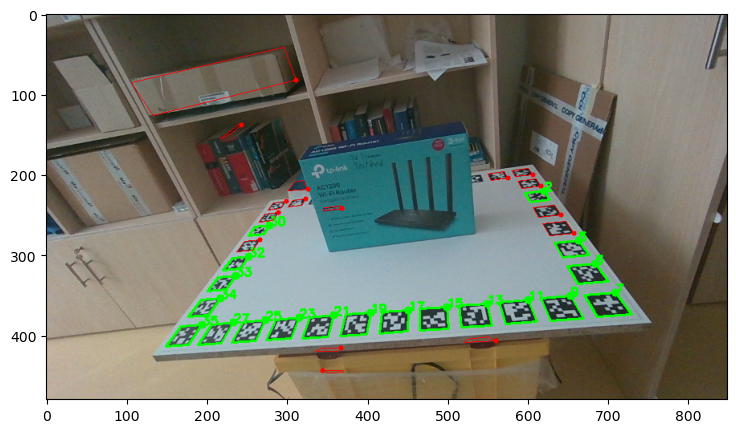

Number of detected tags: 19
(76, 2)
(76, 3)
Rvec: [[-0.83552483]
 [ 0.62027489]
 [ 1.14160624]]
tvec: [[ 64.244177  ]
 [ 13.04097103]
 [840.22271915]]
Tmx: [[ 3.1102636e-01 -9.5032430e-01  1.2095014e-02  6.4244179e+01]
 [ 5.2726406e-01  1.8312556e-01  8.2973349e-01  1.3040971e+01]
 [-7.9073083e-01 -2.5169173e-01  5.5802870e-01  8.4022272e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


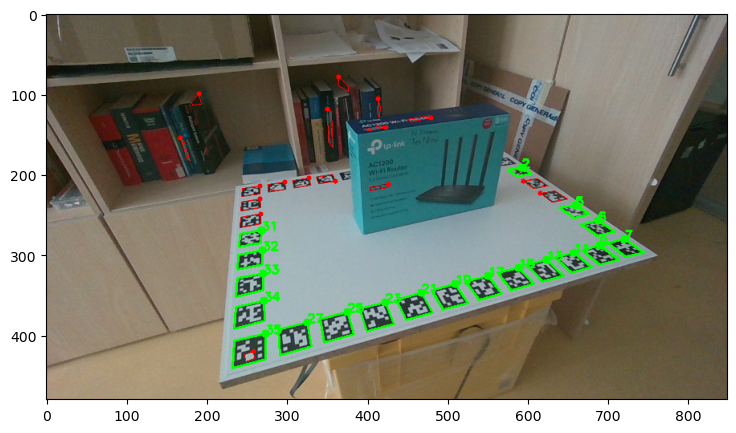

Number of detected tags: 24
(96, 2)
(96, 3)
Rvec: [[-0.73329533]
 [ 0.33378688]
 [ 0.01857255]]
tvec: [[-31.66026296]
 [-65.6459562 ]
 [770.49485633]]
Tmx: [[ 9.4708037e-01 -1.3252661e-01  2.9236197e-01 -3.1660263e+01]
 [-9.9273778e-02  7.4521589e-01  6.5939212e-01 -6.5645958e+01]
 [-3.0525979e-01 -6.5352118e-01  6.9262290e-01  7.7049487e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


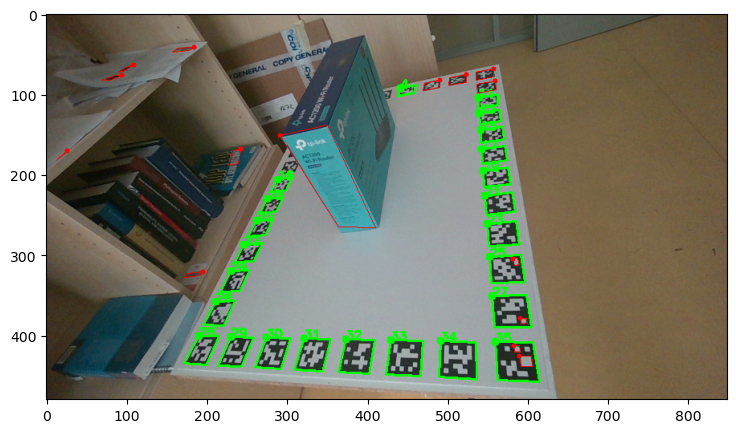

Number of detected tags: 23
(92, 2)
(92, 3)
Rvec: [[-0.52129521]
 [ 0.93658981]
 [ 1.7626157 ]]
tvec: [[-125.13149716]
 [  37.88043864]
 [ 871.0132702 ]]
Tmx: [[-3.7849814e-01 -9.2194521e-01  8.2196027e-02 -1.2513150e+02]
 [ 5.8407617e-01 -1.6900741e-01  7.9390901e-01  3.7880440e+01]
 [-7.1804887e-01  3.4850183e-01  6.0245520e-01  8.7101324e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


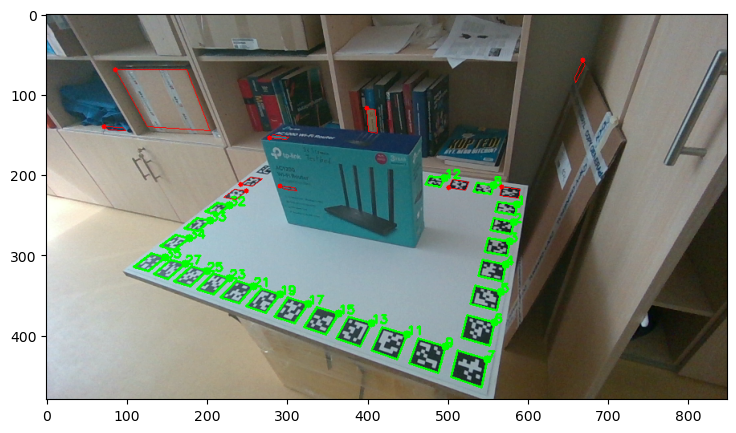

Number of detected tags: 34
(136, 2)
(136, 3)
Rvec: [[-0.00612478]
 [ 0.39184188]
 [ 1.50155913]]
tvec: [[163.75281867]
 [113.27312449]
 [870.93620786]]
Tmx: [[ 1.89543627e-02 -9.68393266e-01  2.48707056e-01  1.63752823e+02]
 [ 9.66437936e-01  8.14872757e-02  2.43634075e-01  1.13273125e+02]
 [-2.56200075e-01  2.35742003e-01  9.37436521e-01  8.70936218e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


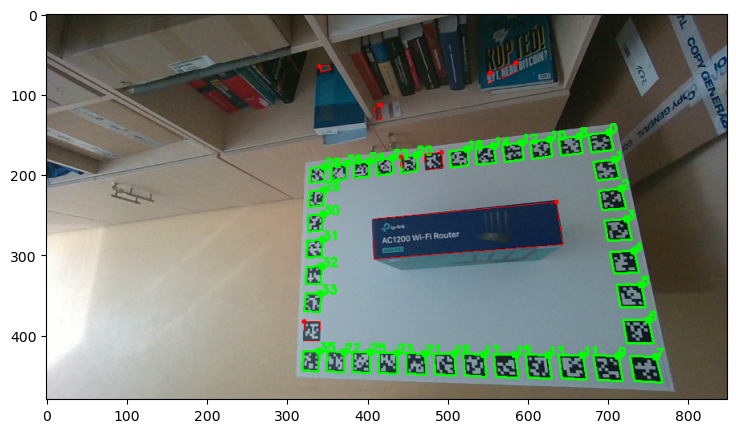

In [ ]:
camera_poses = []
for i, image in enumerate(images):
    bgr = cv2.imread(image)
    img2show = bgr.copy()
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    # Function which returns the image coordinates of the apriltag markers corners
    # and the ids of the markers, also returns the rejected corners
    corners, ids, rejects = detector.detectMarkers(gray)

    num_tags = len(corners)
    print(f"Number of detected tags: {num_tags}")
    corners_image_pts = np.array(corners).reshape(-1, 2)

    # Preallocate the array for the world points for the corners
    corners_world_pts = np.zeros((num_tags * 4, 3), dtype=np.float32)
    # Retrieve corresponding world points for each corner
    for e, tag_id in enumerate(ids):
        i = tag_id[0]
        # Query into the board data
        corners_world_pts[e * 4 : (e + 1) * 4, :] = np.array(
            board_data[str(i)] 
        ).reshape(-1, 3)

    print(corners_image_pts.shape)
    print(corners_world_pts.shape)
    ret, Rvec, tvec = ret, rvec, tvec = cv2.solvePnP(
        corners_world_pts,
        corners_image_pts,
        Kmx,
        dist_coeffs,
        flags=cv2.SOLVEPNP_ITERATIVE,
    )
    if not ret:
        print("Failed to solve PnP")
        continue
    print(f"Rvec: {Rvec}")
    print(f"tvec: {tvec}")
    Tmx = np.eye(4, dtype=np.float32)
    Tmx[:3, :3] = cv2.Rodrigues(Rvec)[0]
    Tmx[:3, 3] = tvec.reshape(-1)
    print(f"Tmx: {Tmx}")
    camera_poses.append(Tmx)

    # INFO: SHOWS THE DETECTION OF THE APRILTAG MARKERS AND THE REJECTED CORNERS
    img2show = visualize_tag_detection(
        img2show,
        corners,
        ids,
        color=(0, 255, 0),
        width=2,
    )
    img2show = visualize_tag_detection(
        img2show,
        rejects,
        color=(0, 0, 255),
        width=1,
    )

    
    cv2_imshow(img2show)




In [25]:
import open3d as o3d
to_draw = [o3d.geometry.TriangleMesh.create_coordinate_frame(size=200)] # Origin frame 
sphere = o3d.geometry.TriangleMesh.create_sphere(radius=10)
sphere.paint_uniform_color([0, 0, 0]) # Black for the origin
colors = [[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]] 

for e, camera_pose in enumerate(camera_poses):
    # Create a 4x4 transformation matrix from the camera pose
    Tmx = camera_pose

    # Create a coordinate frame for the camera pose
    frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=100)
    frame.transform(Tmx)

    sphere = o3d.geometry.TriangleMesh.create_sphere(radius=10)
    sphere.paint_uniform_color(colors[e % len(colors)]) # Color for the camera

    # Visualize the coordinate frame
    to_draw.append(frame)
    to_draw.append(sphere)

o3d.visualization.draw(
    to_draw
)




[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x7fd3b003c010 (threading is enabled)
[Open3D INFO] ICE servers: ["stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"]
EGL(1.5)
OpenGL(4.1)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.


KeyboardInterrupt: 